## Dependencies

In [1]:
import os
import pandas as pd

## Data Loading

In [16]:
def load_variants_and_summaries(folder: os.PathLike) -> pd.DataFrame:
    dfs = []
    for root, _, filenames in os.walk(folder):
        for filename in filenames:
            if filename.endswith('.evo'):
                filepath = os.path.join(root, filename)
                variant = os.path.dirname(filepath)[len(folder)+1:]
                df = pd.read_csv(filepath, sep='\t')
                df = df.set_index('generation_id')
                dfs.append((variant, df))
    return dict(dfs)

In [17]:
summary_per_variant = load_variants_and_summaries(folder='../evolution')

In [18]:
[(k, len(v)) for (k, v) in summary_per_variant.items()]

[('atavism=0.10/pmr=0.10/genes=10', 249),
 ('atavism=0.10/pmr=0.10/genes=05', 249),
 ('atavism=0.10/pmr=0.10/genes=15', 249),
 ('atavism=0.10/pmr=0.25/genes=10', 249),
 ('atavism=0.10/pmr=0.25/genes=05', 249),
 ('atavism=0.10/pmr=0.25/genes=15', 249),
 ('atavism=0.20/pmr=0.10/genes=10', 249),
 ('atavism=0.20/pmr=0.10/genes=05', 249),
 ('atavism=0.20/pmr=0.10/genes=15', 249),
 ('atavism=0.20/pmr=0.25/genes=10', 249),
 ('atavism=0.20/pmr=0.25/genes=05', 249),
 ('atavism=0.20/pmr=0.25/genes=15', 249),
 ('tests', 9),
 ('atavism=0.00/pmr=0.10/genes=10', 249),
 ('atavism=0.00/pmr=0.10/genes=05', 249),
 ('atavism=0.00/pmr=0.10/genes=15', 249),
 ('atavism=0.00/pmr=0.25/genes=10', 249),
 ('atavism=0.00/pmr=0.25/genes=05', 249),
 ('atavism=0.00/pmr=0.25/genes=15', 249)]

## Analysis

## Probability of Leap

### Fitness over Generations

<AxesSubplot:xlabel='generation_id'>

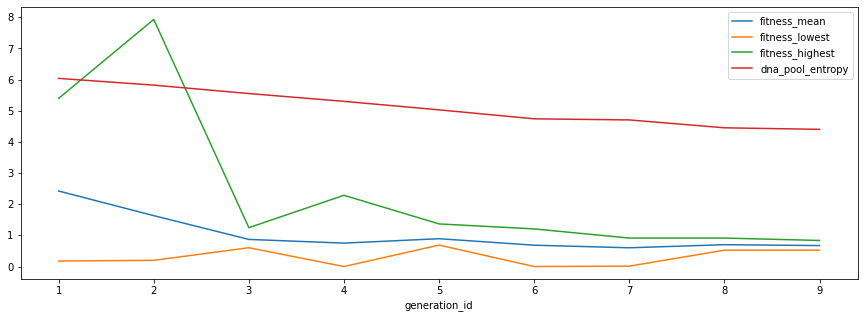

In [22]:
df = summary_per_variant.get('tests')
df = df[['fitness_mean','fitness_lowest','fitness_highest', 'dna_pool_entropy']]
df.plot.line(figsize=(15, 5))

<AxesSubplot:xlabel='generation_id'>

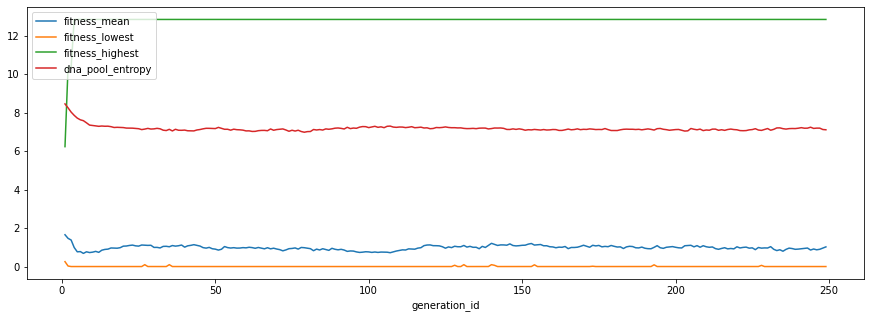

In [25]:
df = summary_per_variant.get('atavism=0.00/pmr=0.10/genes=05')
df = df[['fitness_mean','fitness_lowest','fitness_highest', 'dna_pool_entropy']]
df.plot.line(figsize=(15, 5))